## Importar libreria

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
import urllib.request

# Desactivar verificación de certificados SSL
ssl._create_default_https_context = ssl._create_unverified_context

## Importar base de datos

In [2]:
df = sns.load_dataset('penguins')

## Validación de datos

### Tipos de datos

In [3]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Cuantas variables de cada tipo tenemos

In [4]:
(    
    df
    .dtypes
    .value_counts()
)

float64    4
object     3
Name: count, dtype: int64

### Cuantas variables y observaciones tenemos  el conjunto de datos

In [5]:
(
    df
    .shape
)

(344, 7)

### Existen valores nulos en nuestros datos

In [6]:
(
    df
    .isna()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [7]:
(
    df
    .isna()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

### Proporción de los valores nulos

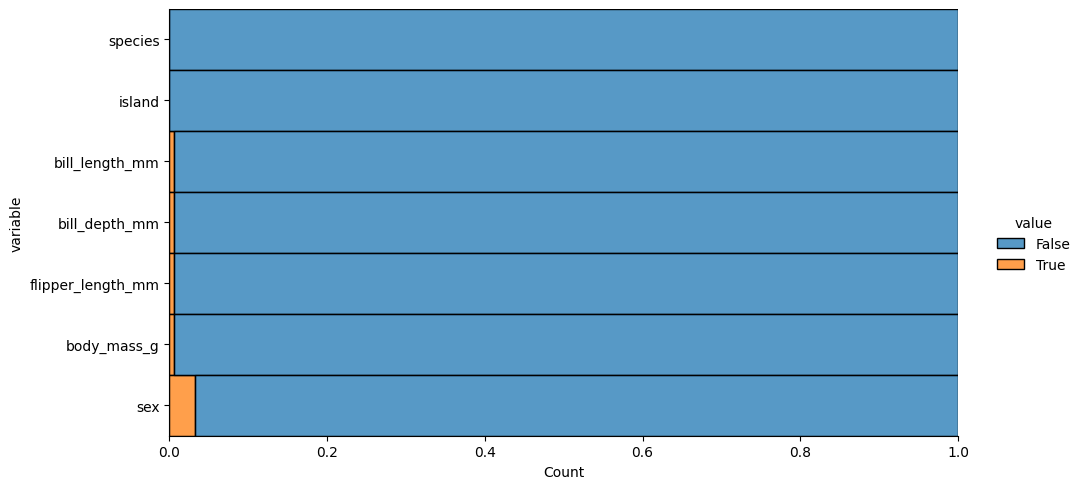

In [9]:
(
    df
    .isna()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple='fill',
                aspect=2
            )
        )
    )
)

### Visualizar los datos nulos

<Axes: >

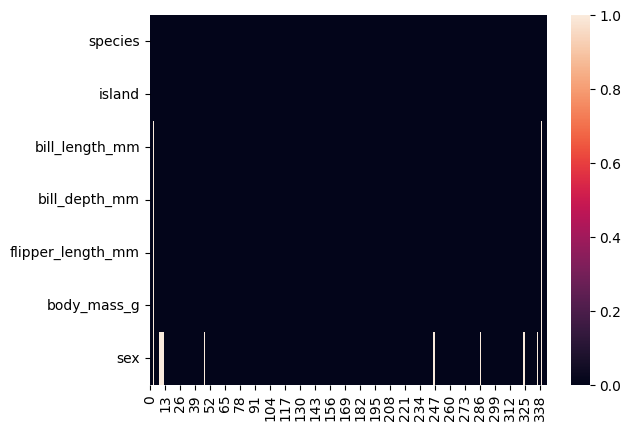

In [13]:
(
    df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(data=df)
        )
    )
)

### Eliminar datos faltantes

Como podemos ver que nuestros datos faltantes se deben principalmente a algunos pinguinos y muy pocos datos sobre el sexo. Por lo que psra propositos de simplicidad vamos a eliminar los pinguinos.

In [15]:
p_df = (
    df
    .dropna()
    .copy()
)